## Load Data

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("../data/MiningProcess_Flotation_Plant_Database.csv")
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


## Convert Data Type

### Date to Datetime

Since some rows are sampled at every 20 seconds, and some are sampled at every minute, we will perform an increment of 20 seconds to the rows that are sampled at every hour. This will allow us to have a uniform time interval for all the rows.

In [115]:
# Convert the date column to datetime
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d %H:%M:%S')

In [116]:
# For the first row, the date is 2017-03-10 01:00:00, increment the date by 20 seconds for each row 
#df2['date'] = pd.date_range(start='2017-03-10 01:00:00', periods=len(df2), freq='20s')

In [117]:
df2.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"
737452,2017-09-09 23:00:00,"49,75","23,2","1164,12","468,019","384,801","9,61497","1,6531","300,355","292,865",...,"308,115","413,754","514,143","881,323","378,969","500,1","374,354","441,182","64,27","1,71"


### Other Columns to Float


In [118]:
# Set the date as the index
df2.set_index('date', inplace=True)

In [119]:
# Convert ',' to '.' and convert to float
for col in df2.columns:
    df2[col] = df2[col].str.replace(',', '.').astype(float)

df2.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


## EDA

In [120]:
df3 = df2.copy()

df3.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### Ore Pulp Quality Correlation

% Iron Feed % Silica Feed are quality measures of the iron ore pulp right before it is fed into the flotation plant. 

                      % Iron Feed  % Silica Feed  % Silica Concentrate  \
% Iron Feed              1.000000      -0.971833             -0.077052   
% Silica Feed           -0.971833       1.000000              0.072724   
% Silica Concentrate    -0.077052       0.072724              1.000000   
% Iron Concentrate       0.055424      -0.044168             -0.800560   

                      % Iron Concentrate  
% Iron Feed                     0.055424  
% Silica Feed                  -0.044168  
% Silica Concentrate           -0.800560  
% Iron Concentrate              1.000000  


Text(0.5, 1.0, 'Correlation of Ore Pulp Quality against Concentrate Quality')

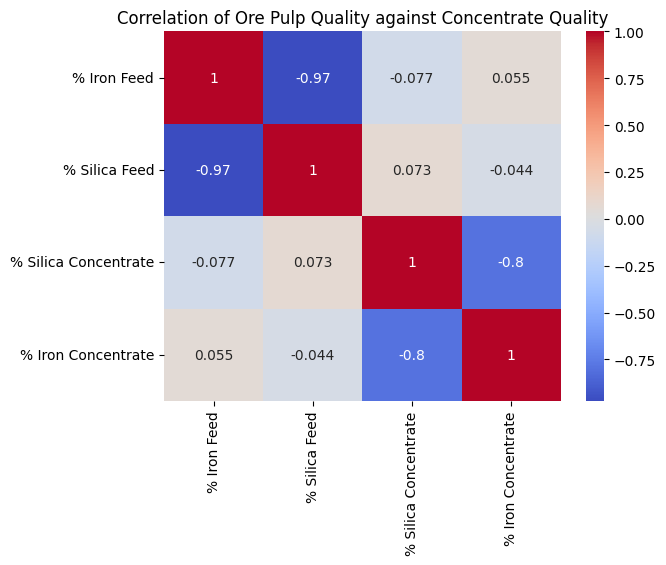

In [121]:
# Check the correlation of '% Iron Feed' % 'Silica Feed' against the '% Silica Concentrate'
ore_pulp_quality = ['% Iron Feed', '% Silica Feed']
print(df3[ore_pulp_quality +['% Silica Concentrate'] + ['% Iron Concentrate']].corr())

# Plot the correlation using heatmap
sns.heatmap(df3[ore_pulp_quality +['% Silica Concentrate'] + ['% Iron Concentrate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Ore Pulp Quality against Concentrate Quality')

Conclusion: % Silica Concentrate is correlated with % Silica Feed, and % Iron Concentrate is correlated with % Iron Feed.

### Important Variables Correlation

Starch Flow, Amina Flow, Ore Pulp Flow, Ore Pulp pH, Ore Pulp Density are the most important variables that impact in the ore quality in the end of the process

                      Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
Starch Flow              1.000000    0.254748       0.042703     0.263020   
Amina Flow               0.254748    1.000000       0.212252     0.123690   
Ore Pulp Flow            0.042703    0.212252       1.000000     0.118376   
Ore Pulp pH              0.263020    0.123690       0.118376     1.000000   
Ore Pulp Density         0.226004    0.655788       0.012279     0.115189   
% Silica Concentrate    -0.066394    0.156701       0.008222    -0.147739   

                      Ore Pulp Density  % Silica Concentrate  
Starch Flow                   0.226004             -0.066394  
Amina Flow                    0.655788              0.156701  
Ore Pulp Flow                 0.012279              0.008222  
Ore Pulp pH                   0.115189             -0.147739  
Ore Pulp Density              1.000000              0.046984  
% Silica Concentrate          0.046984              1.000000  


<Axes: >

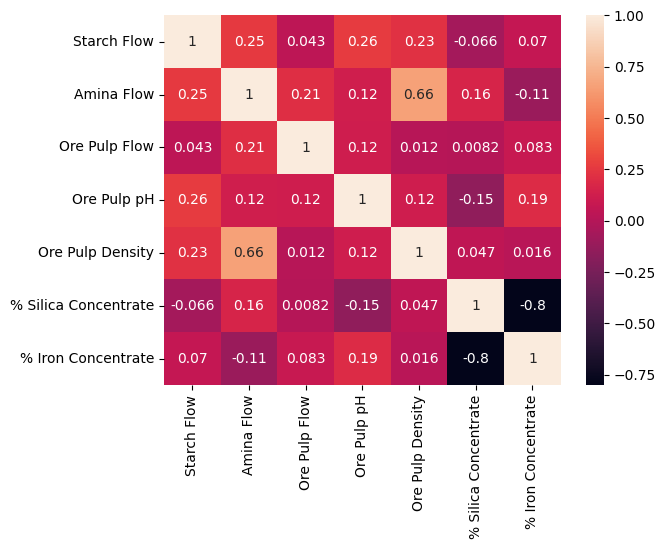

In [122]:
# Check the correlation of 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', '% Silica Concentrate'
important_variables = ['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density']
print(df3[important_variables + ['% Silica Concentrate']].corr())

# Plot a heatmap of the correlation
sns.heatmap(df3[['Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', '% Silica Concentrate','% Iron Concentrate']].corr(), annot=True)

Conclusion: Amina Flow is correlated with % Silica Concentrate, and Starch Flow is correlated with % Iron Concentrate.

### Air Flow Correlation

All other columns, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality.) 

<Axes: >

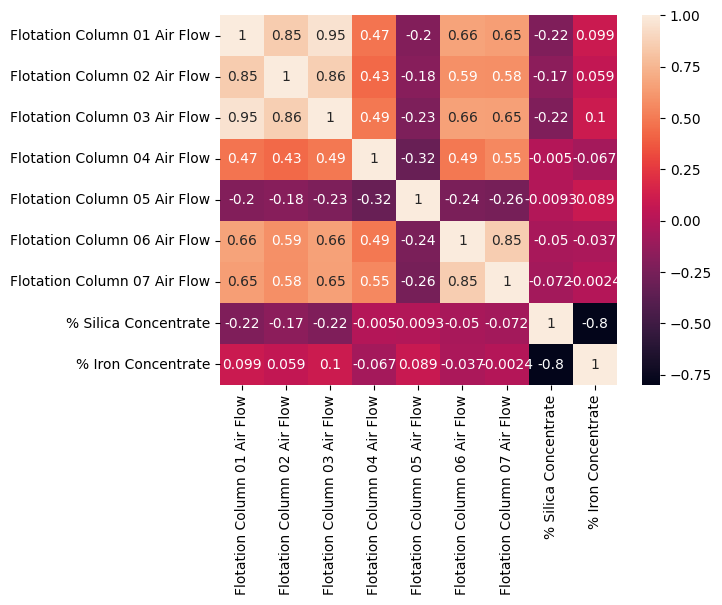

In [123]:
# Store all airflow variables in a list
airflow_variables = [col for col in df3.columns if 'Air Flow' in col]

# Plot the correlation of the airflow variables against the '% Silica Concentrate' using a heatmap
sns.heatmap(df3[airflow_variables + ['% Silica Concentrate'] + ['% Iron Concentrate']].corr(), annot=True)


Conclusion: It is observed that columns 01, 02 and 03 are negatively correlated with the % Silica Concentrate suggesting that these columns are important to increase the % Iron Concentrate. All other other columns are still negatively correlated, suggesting that the amount of air flow is needed to maximize the percentage of Iron Concentrate.

### Froth Level Correlation

All other columns, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality.) 

['Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']


<Axes: >

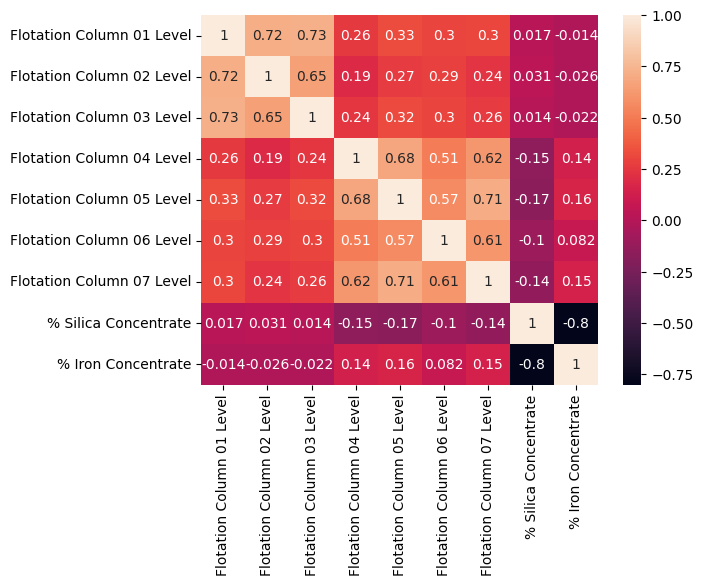

In [124]:
# Store all Column variables in a list
froth_level_variables = [col for col in df3.columns if 'Level' in col]
print(froth_level_variables)

# Plot the correlation of the froth level variables against the '% Silica Concentrate' using a heatmap
sns.heatmap(df3[froth_level_variables + ['% Silica Concentrate'] + ['% Iron Concentrate']].corr(), annot=True)

Conclusion: levels 01, 02 and 03 are positively correlated with the % Silica Concentrate whereas it is negatively correlated with % Iron Concentrate suggesting that these columns hold a higher amount of silica. Conversely, levels 04, 05 and 06 are negatively correlated with the % Silica Concentrate and positively correlated with % Iron Concentrate suggesting that these columns hold a higher amount of iron.

### Correlation of All Other Variables with % Silica Concentrate

% Silica Concentrate            1.000000
Amina Flow                      0.156701
% Silica Feed                   0.072724
Ore Pulp Density                0.046984
Flotation Column 02 Level       0.030955
Flotation Column 01 Level       0.017217
Flotation Column 03 Level       0.014246
Ore Pulp Flow                   0.008222
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Starch Flow                    -0.066394
Flotation Column 07 Air Flow   -0.071776
% Iron Feed                    -0.077052
Flotation Column 06 Level      -0.102443
Flotation Column 07 Level      -0.141387
Ore Pulp pH                    -0.147739
Flotation Column 04 Level      -0.149456
Flotation Column 02 Air Flow   -0.167398
Flotation Column 05 Level      -0.169170
Flotation Column 03 Air Flow   -0.218891
Flotation Column 01 Air Flow   -0.219158
% Iron Concentrate             -0.800560
Name: % Silica Concentrate, dtype: float64


Text(0.5, 1.0, 'Correlation of % Silica Concentrate against other variables')

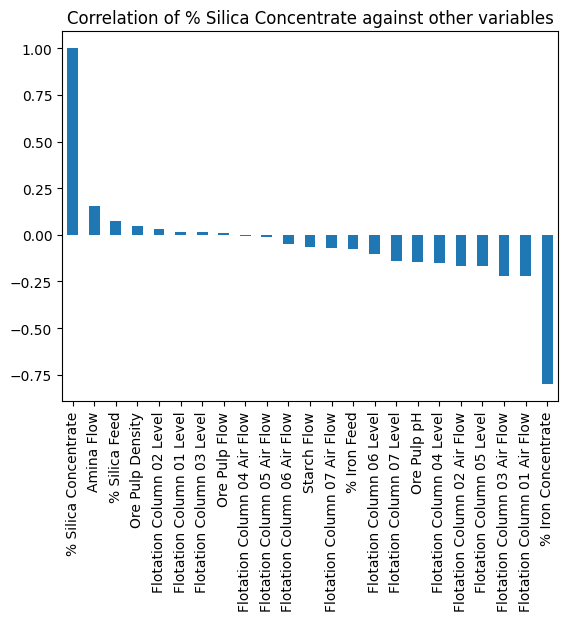

In [134]:
# Extract the % Silica Concentrate correlation column and sort it in descending order
print(df3.corr()['% Silica Concentrate'].sort_values(ascending=False))

# Plot the correlation of the % Silica Concentrate against the other columns in a bar chart, in descending order
df3.corr()['% Silica Concentrate'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of % Silica Concentrate against other variables')

Conclusion: Amina Flow, % Silica Feed, Ore Pulp Density, Flotation Column 01 Level, Flotation Column 02 Level, Flotation Column 03 Level and Ore Pulp Flow are positively correlated to the amount of Silica Concentrate at the end of the froth flotation process.

### Correlation of All Other Variables with % Iron Concentrate

% Iron Concentrate              1.000000
Ore Pulp pH                     0.192992
Flotation Column 05 Level       0.160824
Flotation Column 07 Level       0.146508
Flotation Column 04 Level       0.137019
Flotation Column 03 Air Flow    0.100136
Flotation Column 01 Air Flow    0.098599
Flotation Column 05 Air Flow    0.088762
Ore Pulp Flow                   0.083120
Flotation Column 06 Level       0.082300
Starch Flow                     0.069657
Flotation Column 02 Air Flow    0.058744
% Iron Feed                     0.055424
Ore Pulp Density                0.015580
Flotation Column 07 Air Flow   -0.002447
Flotation Column 01 Level      -0.014223
Flotation Column 03 Level      -0.022084
Flotation Column 02 Level      -0.026048
Flotation Column 06 Air Flow   -0.036523
% Silica Feed                  -0.044168
Flotation Column 04 Air Flow   -0.067494
Amina Flow                     -0.110148
% Silica Concentrate           -0.800560
Name: % Iron Concentrate, dtype: float64


Text(0.5, 1.0, 'Correlation of % Iron Concentrate against other variables')

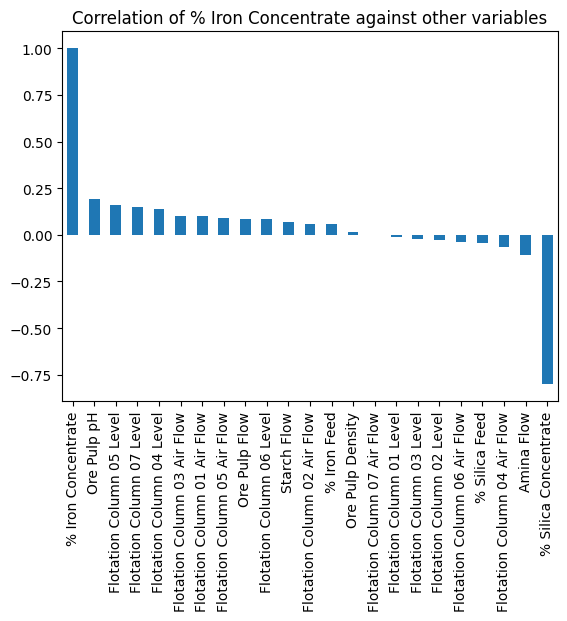

In [133]:
# Extract the % Iron Concentrate correlation column and sort it in descending order
print(df3.corr()["% Iron Concentrate"].sort_values(ascending=False))

# Plot the correlation of the % Iron Concentrate against the other columns in a bar chart, in descending order
df3.corr()["% Iron Concentrate"].sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation of % Iron Concentrate against other variables")

### Monthly Analysis

In [127]:
df4 = df3.copy()

# Reset the index of df4
df4.reset_index(inplace=True)

# Create a new column called 'month' and store the month of the date in it
df4['month'] = df4['date'].dt.month

Text(0, 0.5, 'Average % Silica Concentrate')

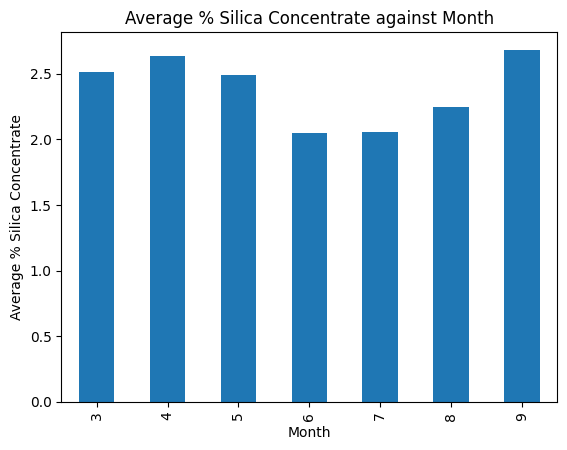

In [128]:
# Plot the average % Silica Concentrate against the month
df4.groupby('month')['% Silica Concentrate'].mean().plot(kind='bar')
plt.title('Average % Silica Concentrate against Month')
plt.xlabel('Month')
plt.ylabel('Average % Silica Concentrate')

Text(0, 0.5, 'Average % Iron Concentrate')

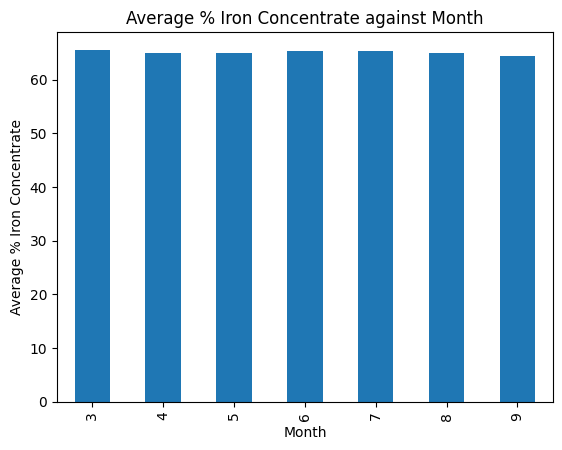

In [129]:
# Plot the average % Iron Concentrate against the month
df4.groupby('month')["% Iron Concentrate"].mean().plot(kind="bar")
plt.title('Average % Iron Concentrate against Month')
plt.xlabel('Month')
plt.ylabel('Average % Iron Concentrate')

month
3     37614
4    129599
5    133920
6    129600
7    133920
8    133920
9     38880
Name: count, dtype: int64


Text(0, 0.5, 'Number of Records')

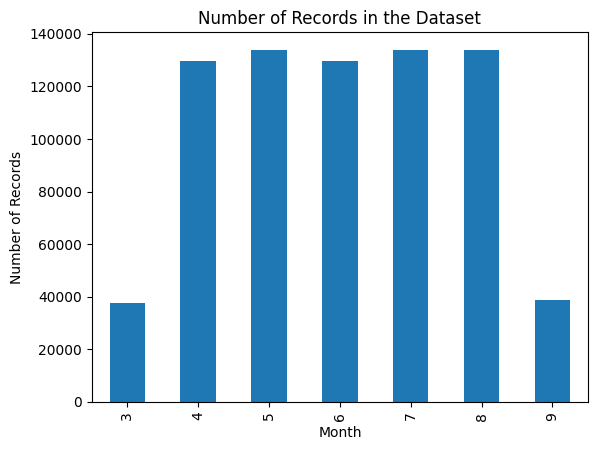

In [130]:
# Count the number of months in the dataset and plot a bar chart
months_record = df4['month'].value_counts()
# Sorth the months in ascending order
months_record = months_record.sort_index()
print(months_record)

# Plot the number of months in the dataset
months_record.plot(kind='bar')
plt.title('Number of Records in the Dataset')
plt.xlabel('Month')
plt.ylabel('Number of Records')


Observation: Although the number of records remain fairly consisten throughout the months, the amount of % Iron Concentrate and % Silica Concentrate varies throughout the months. The lowest amount of % Silica Concentrate is observed in the month of June and the highest in April. Since the following variables are positively correlated to the % of Silica Concentrate: 
- Amina Flow
- % Silica Feed
- Ore Pulp Density
- Flotation Column 01 Level
- Flotation Column 02 Level
- Flotation Column 03 Level
- Ore Pulp Flow

We shall perform a statistical analysis of these variables for the months April and June to observe any difference. 

In [139]:
# From df3, extract the month number 4 and store it in a new dataframe called april
april = df3[df3.index.month == 4]

# From df3, extract the month number 6 and store it in a new dataframe called june
june = df3[df3.index.month == 6]

correlated_variables = ['Amina Flow', '% Silica Feed', 'Ore Pulp Density', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Ore Pulp Flow']

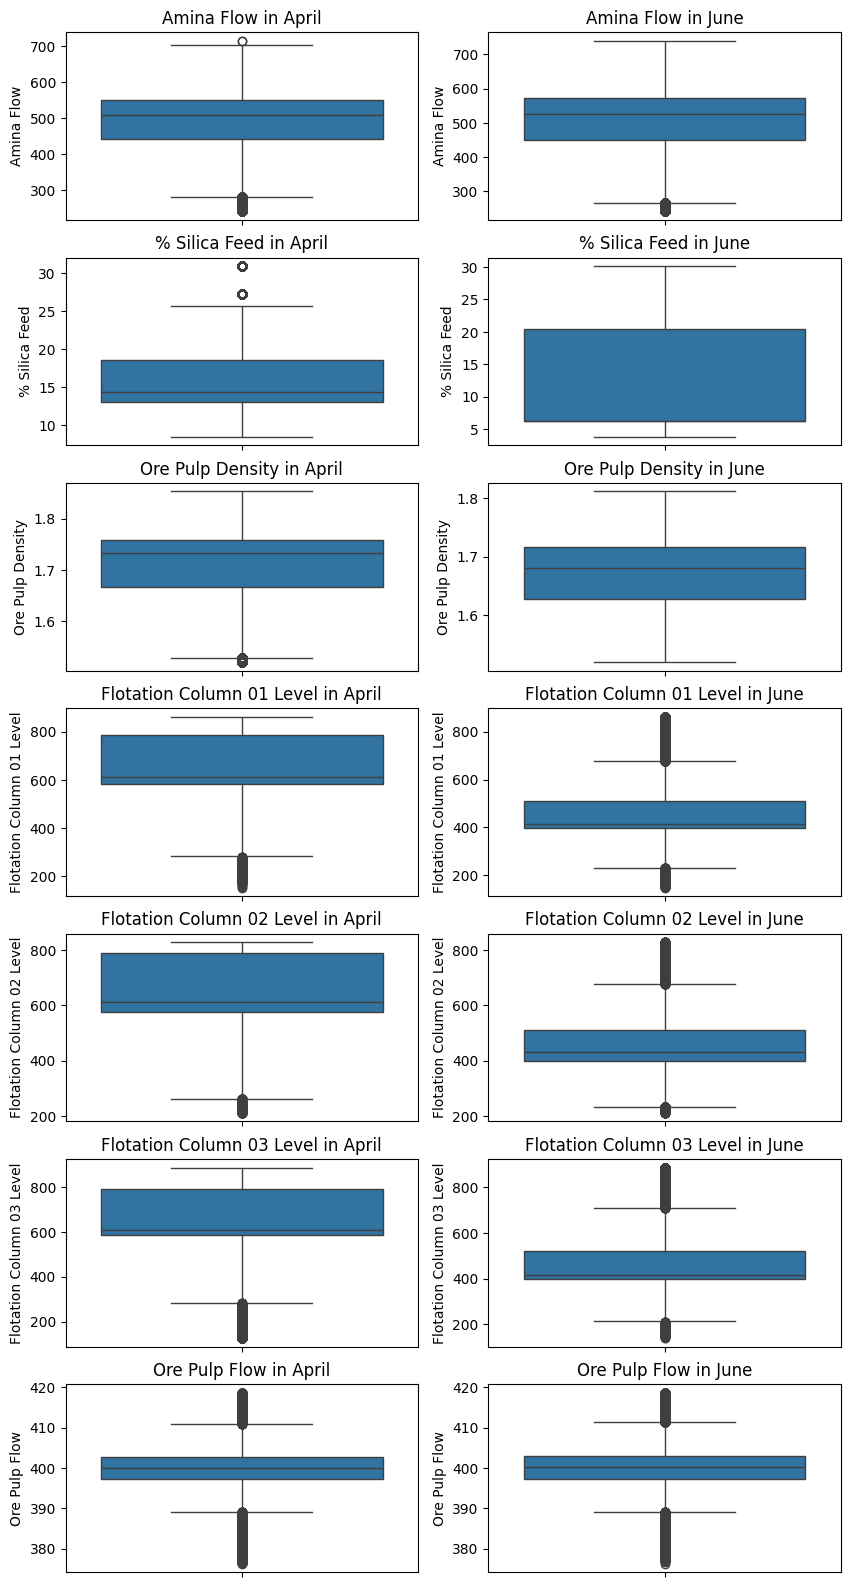

In [154]:
# Loop through the correlated variables plot a box plot for each variable, side by side for the month of April and June using subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
for i, var in enumerate(correlated_variables):
    sns.boxplot(data=april[var], ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} in April')
    sns.boxplot(data=june[var], ax=axes[i, 1])
    axes[i, 1].set_title(f'{var} in June')




Observation: There is a uge difference in the mean of Flotation Columns 01, 02 and 03 which suggests that these columns contribute to the lower amount of % Silica Concentrate in the month of June, despite having similar amount of Amina Flow $(which is the highest contributor to the % Silica Concentrate) in both months.

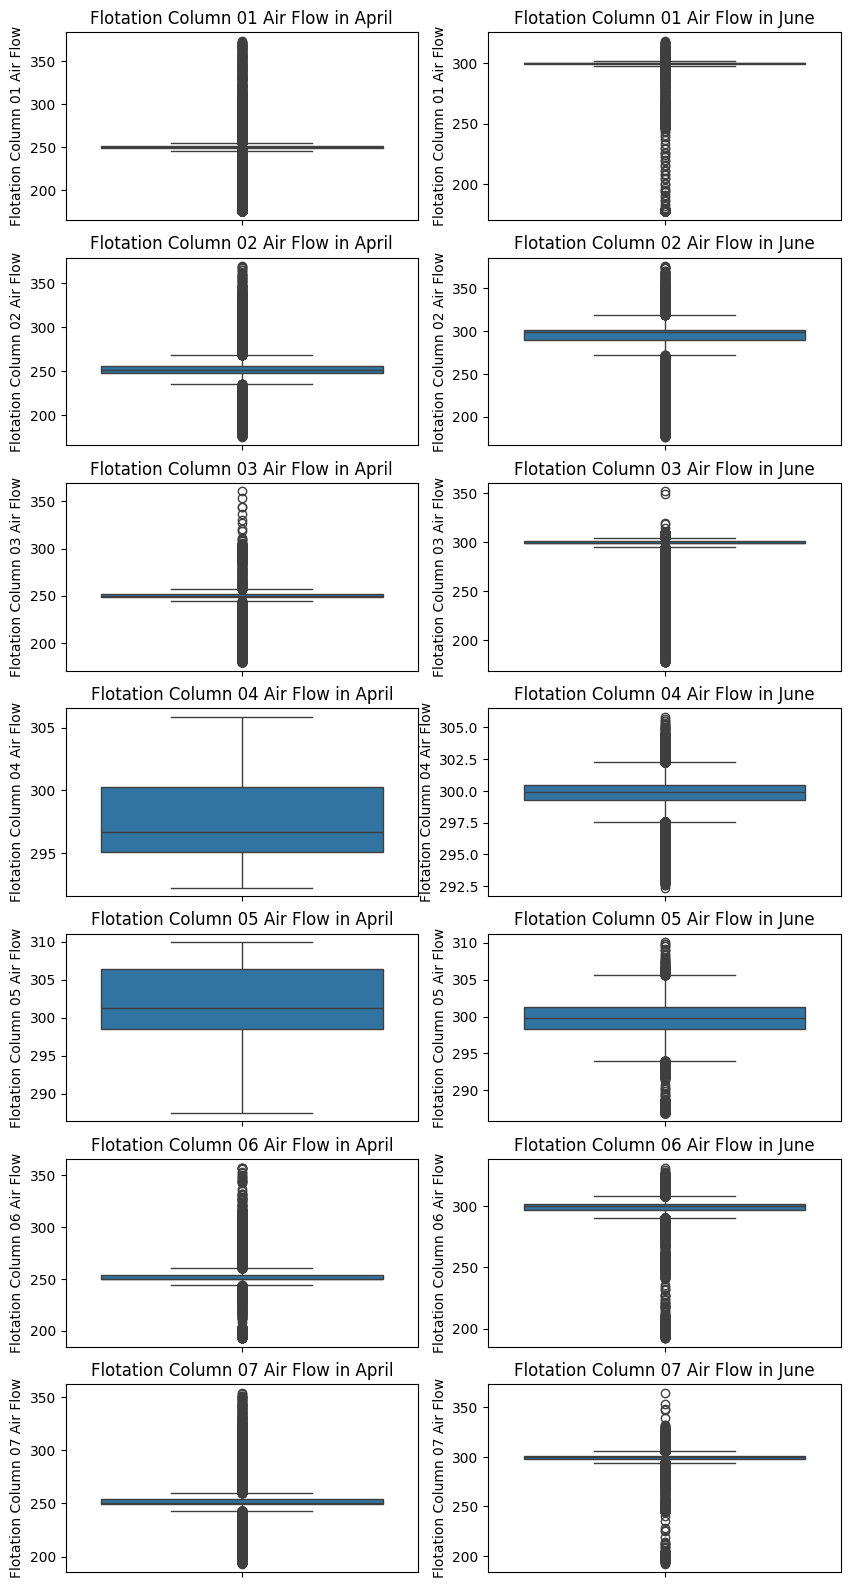

In [158]:
# Loop through the airflow variables plot a box plot for each variable, side by side for the month of April and June using subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
for i, var in enumerate(airflow_variables):
    sns.boxplot(data=april[var], ax=axes[i, 0])
    axes[i, 0].set_title(f"{var} in April")
    sns.boxplot(data=june[var], ax=axes[i, 1])
    axes[i, 1].set_title(f"{var} in June")

Observation: It is observed that the mean values of air flow columns 01, 03, 04 and 07 are higher in June as opposed to April. Since these columns are positively correlated to the % Iron Concentrate, while % Iron Concentrate is negatively correlated to % Silica Concentrate, we can hypothesise that by increasing the amount of air flow in these columns, we can increase the % Iron Concentrate. This in turn, decreases the % Silica Concentrate for our flotation plant.

### Skewness and Kurtosis of Variables

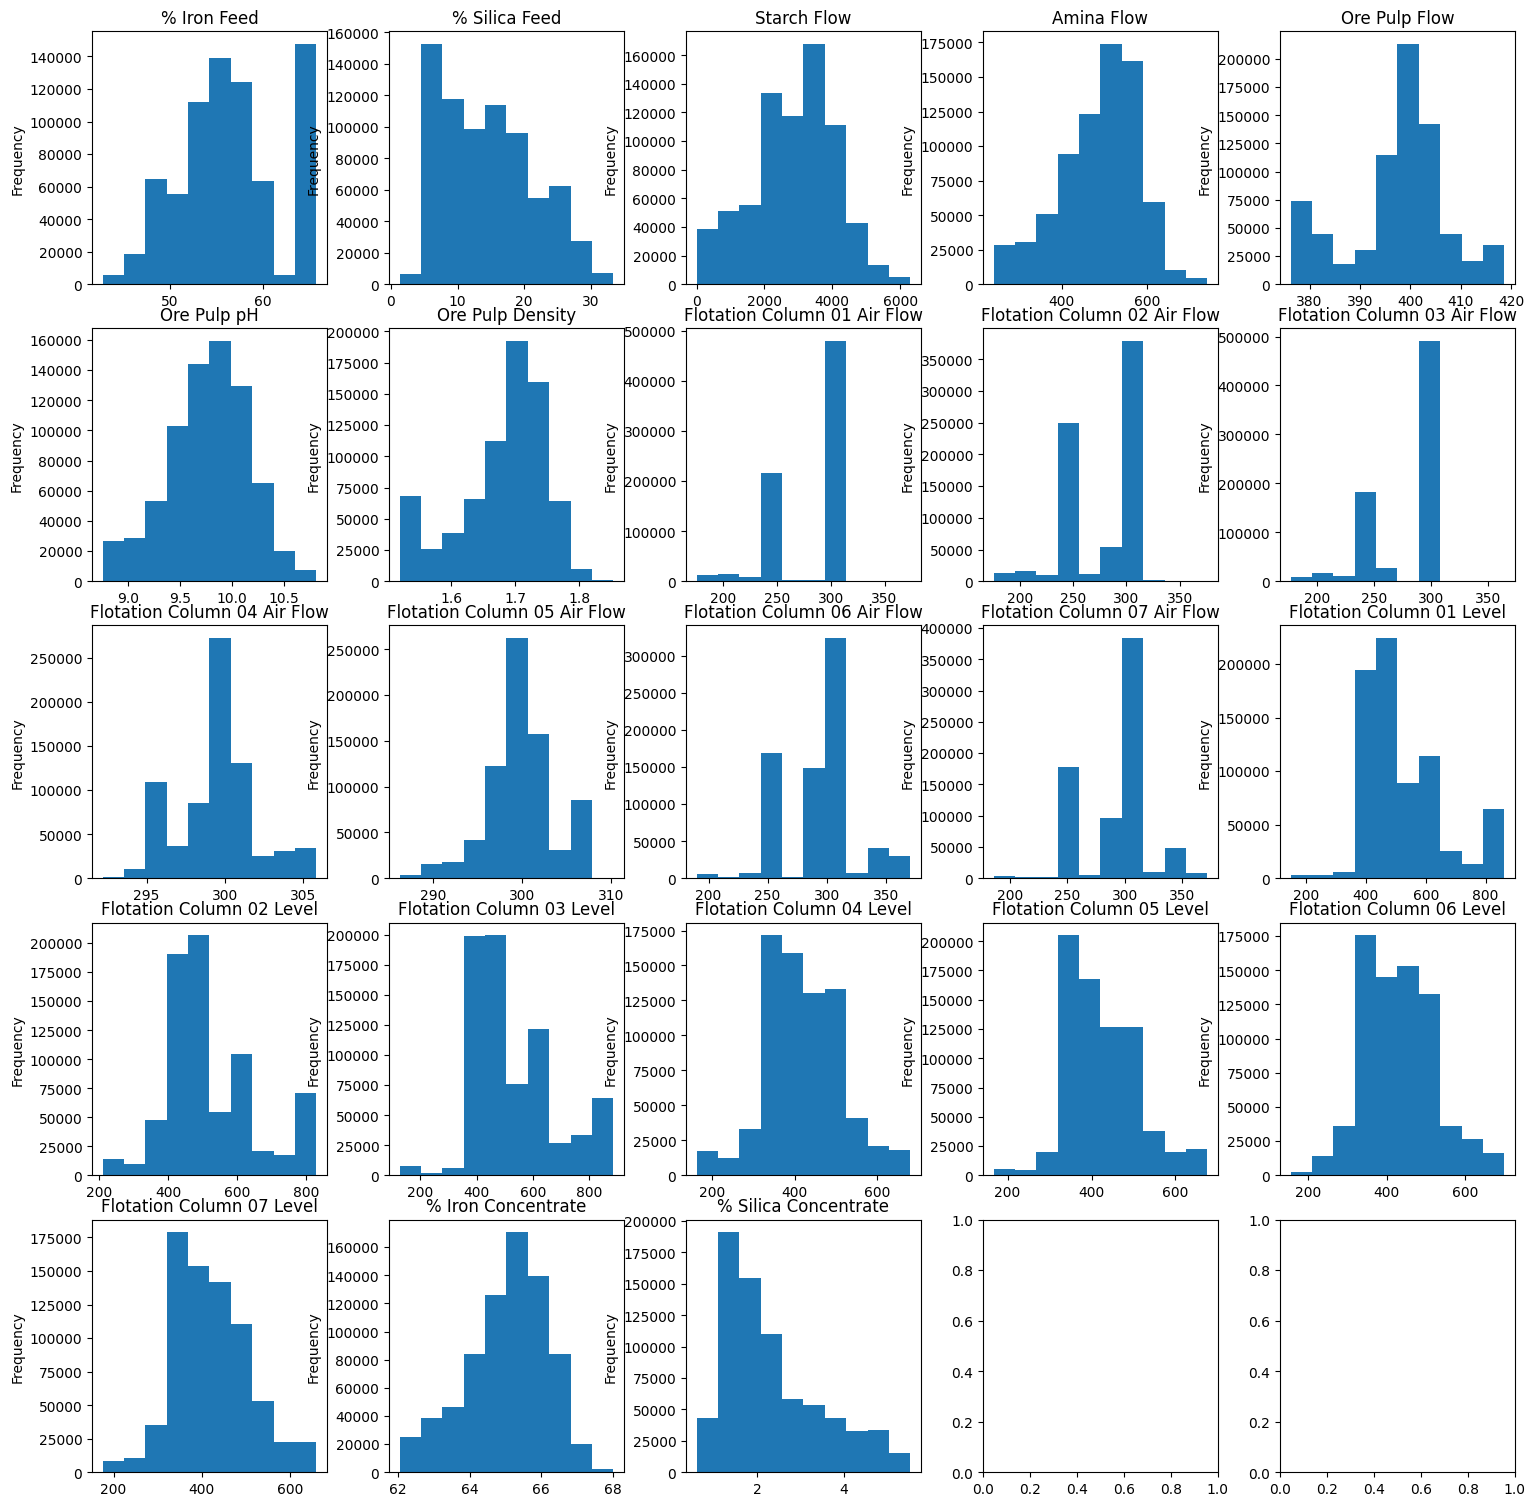

In [131]:
# Get the number of columns in df3
num_columns = len(df3.columns)

# Plot the distribution of all columns using subplot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.tight_layout()
row = 0
col = 0
for i, column in enumerate(df3.columns):
    if col == 5:
        row += 1
        col = 0
    df3[column].plot(kind='hist', ax=axes[row, col], title=column)
    col += 1


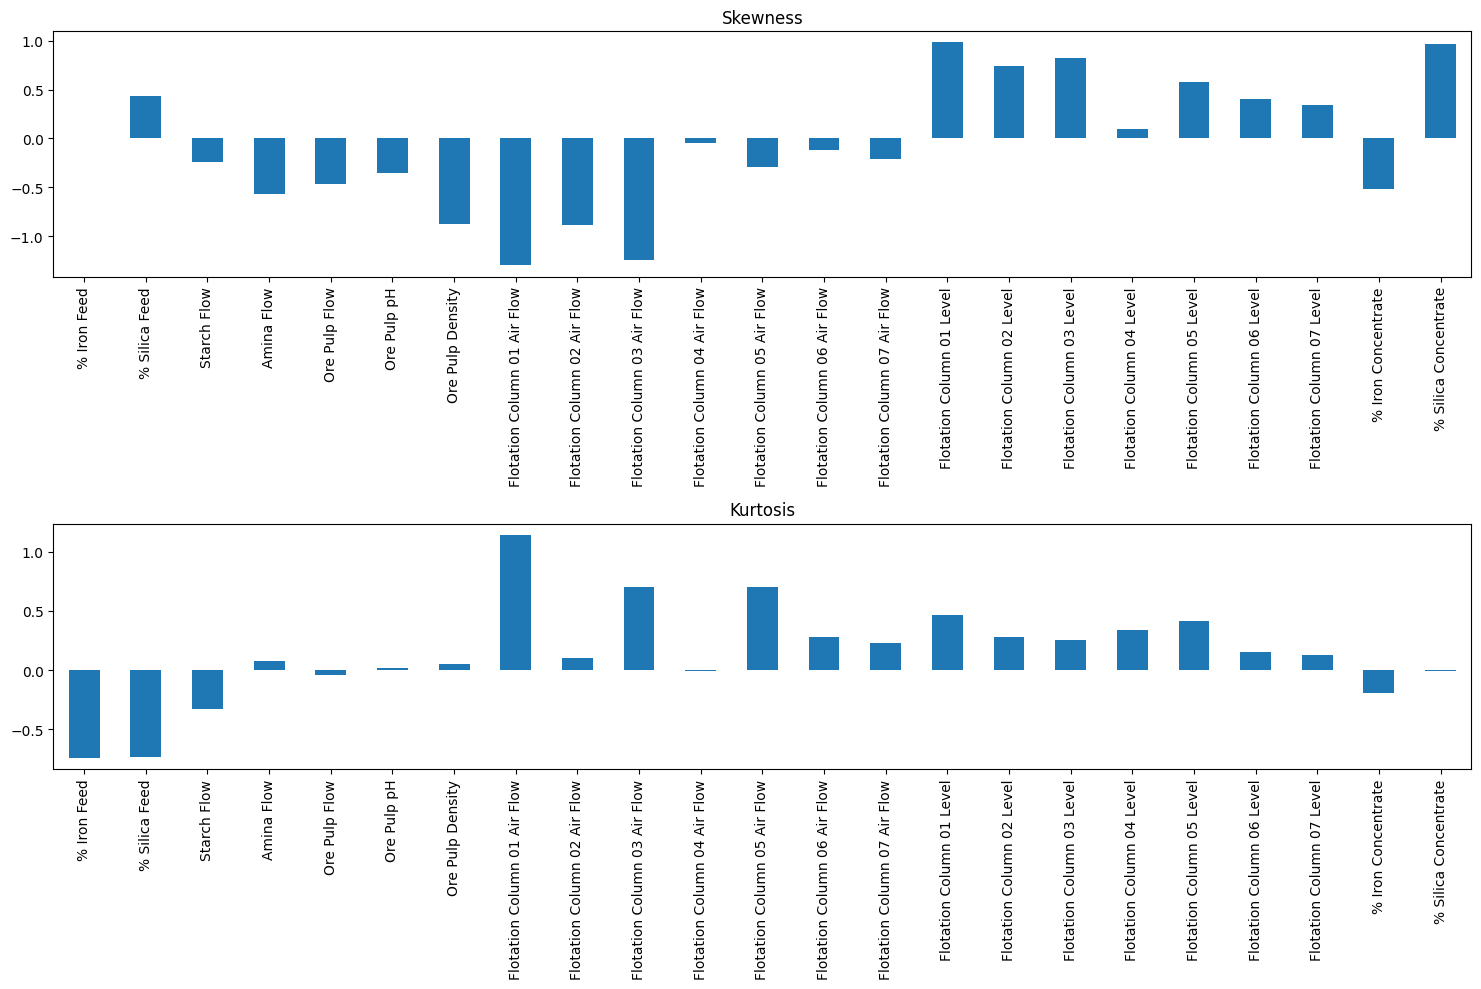

In [132]:
# Calculate skewness and kurtosis for each column in df3
skewness = df3.skew()
kurtosis = df3.kurtosis()
# Plot the skewness and kurtosis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
skewness.plot(kind='bar', ax=axes[0], title='Skewness')
kurtosis.plot(kind='bar', ax=axes[1], title='Kurtosis')
# Avoid overlapping of the plots
plt.tight_layout()

Conclusion: Some variables are highly skewed and kurtotic, which suggests that they are not normally distributed. This is important to note as we will be using linear regression models to predict the % Silica Concentrate. We will need to perform a transformation on these variables to make them normally distributed.